In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

---

##### **Study:** *Correlation of performance test scores with “tissue concentration” of lysergic acid diethylamide in human subiects. September 1968*
##### **Authors:** *John G. Wagner Ph.D.  George K. Aghajanian M.D.  Oscar H. L. Bing M.D.*

---

In [2]:
data = pd.read_csv('lsd_math_score_data.csv')

In [3]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [4]:
time = data[['Time_Delay_in_Minutes']]
lsd = data[['LSD_ppm']]
score = data[['Avg_Math_Test_Score']]

---

##### Check what is the 'tissue concentration of LSD' over time.
##### *(increasing behaviour)*

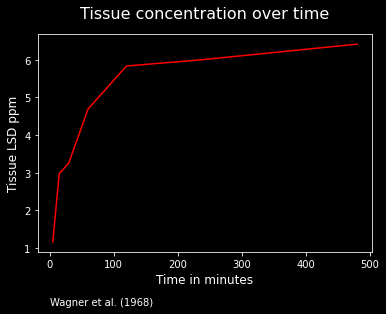

In [5]:
%matplotlib inline

plt.style.use('dark_background')
plt.title('Tissue concentration over time', fontsize=16, pad=16)
plt.xlabel('Time in minutes', fontsize=12)
plt.ylabel('Tissue LSD ppm', fontsize=12)
plt.text(0, -0.5, 'Wagner et al. (1968)')

plt.plot(time, lsd, c='r')
plt.show()

---

##### Using Ordinary least squares Linear Regression to predict the performance in a math test based on the tissue concentration of LSD.

In [6]:
reg = LinearRegression().fit(lsd, score)
print('Coefficient: ', reg.coef_[0][0])
print('Independent term: ', reg.intercept_[0])
print('R-Square: ', reg.score(lsd, score))
predicted_score = reg.predict(lsd)

Coefficient:  -9.009466415296782
Independent term:  89.12387376799305
R-Square:  0.8778349707775888


##### *The values estimated in the **original study** for the coefficient and for the independent term were:*
##### *Coefficient: -9.44*
##### *Independent term: 89.7*

---

##### *Drawing the least squares line:*

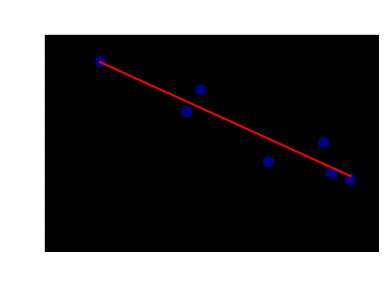

In [7]:
%matplotlib inline
plt.title('Math test performance vs LSD-25', fontsize=16, pad=16)
plt.xlabel('Tissue LSD ppm', fontsize=12)
plt.ylabel('Performance score', fontsize=12)
plt.xlim(0, 7)
plt.ylim(0, 90)

plt.scatter(lsd, score, c='b', s=100, alpha=0.5)
plt.plot(lsd, predicted_score, c='r', lw=2)
plt.show()